<a href="https://colab.research.google.com/github/Pedro-Ortega-G/MAPAS_CON_GEOPANDAS/blob/main/carga_archivos_gis_030325_2_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivo KML de fallas extraído: /content/kmz_extracted/doc.kml
Figura: Gravimetría con Fallas Sibundoy


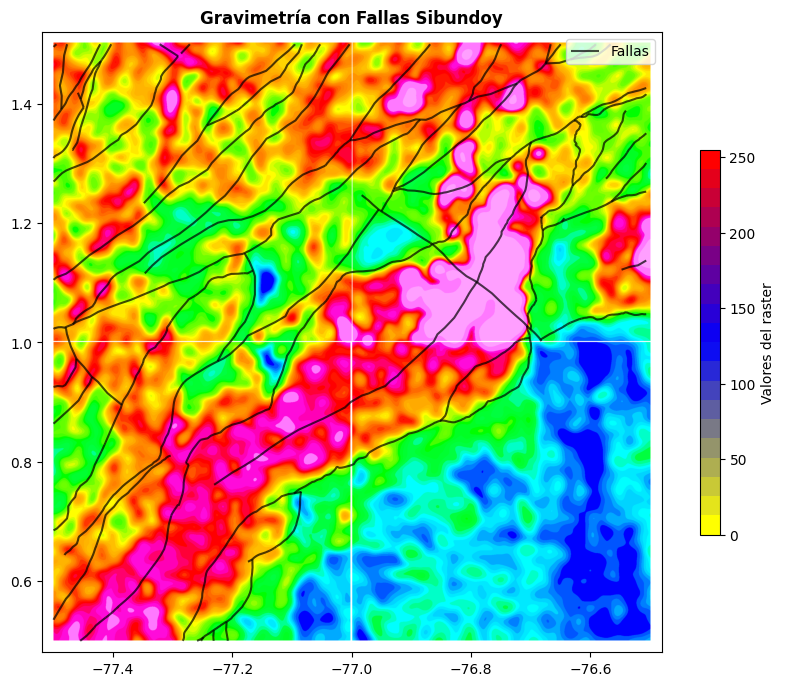

In [2]:
# Paso 1: Instalar las bibliotecas necesarias
!pip install rasterio matplotlib geopandas fiona pykml

# Paso 2: Importar las bibliotecas requeridas
import os
import zipfile
import rasterio
from rasterio.plot import show as raster_show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Paso 3: Definir las rutas de los archivos
ruta_kmz_fallas = '/content/fallas_Sibundoy.kmz'  # Archivo KMZ de fallas
ruta_tiff_gravimetria = '/content/gravimetria3.tif'  # Archivo TIFF de gravimetría

# Paso 4: Función para extraer el archivo KML del KMZ
def extraer_kml_desde_kmz(ruta_kmz):
    # Crear una carpeta temporal para extraer el contenido
    carpeta_temporal = '/content/kmz_extracted'
    os.makedirs(carpeta_temporal, exist_ok=True)

    # Extraer el archivo KML del KMZ
    with zipfile.ZipFile(ruta_kmz, 'r') as kmz:
        kmz.extractall(carpeta_temporal)

    # Buscar el archivo KML dentro de la carpeta extraída
    archivos_extraidos = os.listdir(carpeta_temporal)
    for archivo in archivos_extraidos:
        if archivo.endswith('.kml'):
            return os.path.join(carpeta_temporal, archivo)

    raise FileNotFoundError("No se encontró ningún archivo KML dentro del KMZ.")

# Extraer el archivo KML de fallas
ruta_kml_fallas = extraer_kml_desde_kmz(ruta_kmz_fallas)
print(f"Archivo KML de fallas extraído: {ruta_kml_fallas}")

# Paso 5: Leer el archivo KML con GeoPandas
try:
    # Leer el archivo KML de fallas
    fallas_Sibundoy = gpd.read_file(ruta_kml_fallas)

except Exception as e:
    print(f"Error al cargar el archivo KML: {e}")

# Paso 6: Función para visualizar un raster con una capa vectorial superpuesta
def visualizar_raster_vector(raster_path, vector_data, titulo, etiqueta_vector):
    try:
        # Abrir el archivo raster
        raster = rasterio.open(raster_path)
        raster_data = raster.read(1)  # Leer la primera banda
        raster_data = np.ma.masked_where(raster_data == raster.nodata, raster_data)  # Enmascarar valores nulos

        # Definir un mapa de colores personalizado (amarillo -> azul -> rojo)
        colors = [
            (1.0, 1.0, 0.0),  # Amarillo
            (0.0, 0.0, 1.0),  # Azul
            (1.0, 0.0, 0.0)   # Rojo
        ]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=20)  # 20 pasos

        # Normalizar los datos del raster
        norm = Normalize(vmin=np.nanmin(raster_data), vmax=np.nanmax(raster_data))

        # Crear la figura
        fig, ax = plt.subplots(figsize=(10, 10))

        # Visualizar el archivo raster con el mapa de colores seleccionado
        im = ax.imshow(raster_data, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(raster))
        rasterio.plot.show(raster, ax=ax, cmap=cmap, norm=norm, title=titulo)

        # Superponer la geometría vectorial
        vector_data.plot(ax=ax, color='black', edgecolor='black', alpha=0.7, label=etiqueta_vector)

        # Agregar una barra de colores
        cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.5)
        cbar.set_label('Valores del raster')

        # Agregar una leyenda
        plt.legend(loc='upper right')

        # Mostrar la figura
        plt.show()

    except Exception as e:
        print(f"Error al cargar el archivo raster ({raster_path}): {e}")

# Paso 7: Generar la figura combinada
print("Figura: Gravimetría con Fallas Sibundoy")
visualizar_raster_vector(ruta_tiff_gravimetria, fallas_Sibundoy, "Gravimetría con Fallas Sibundoy", "Fallas")

Archivo KML de fallas extraído: /content/kmz_extracted/doc.kml
Figura: Topografía con Fallas Sibundoy


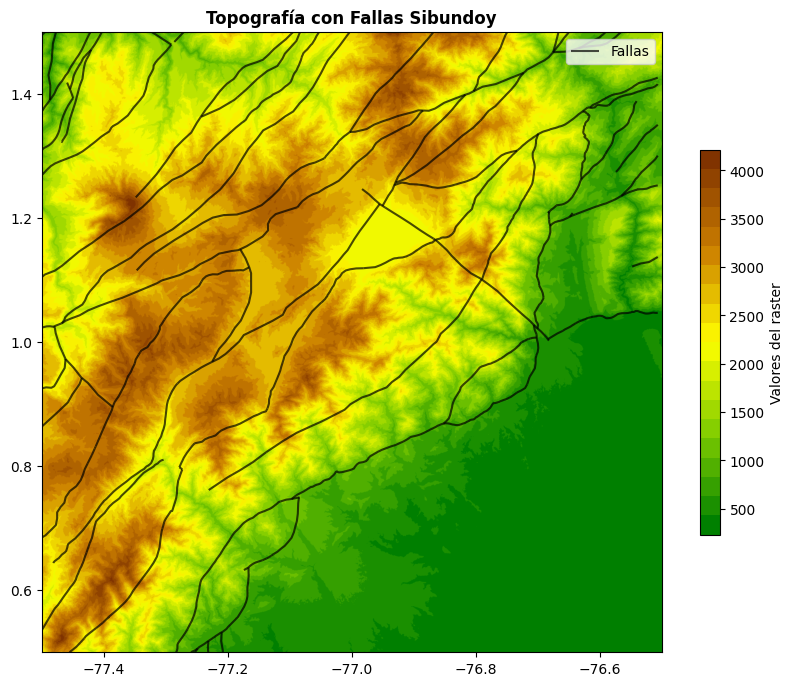

In [3]:
# Paso 1: Instalar las bibliotecas necesarias
!pip install rasterio matplotlib geopandas fiona pykml

# Paso 2: Importar las bibliotecas requeridas
import os
import zipfile
import rasterio
from rasterio.plot import show as raster_show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Paso 3: Definir las rutas de los archivos
ruta_kmz_fallas = '/content/fallas_Sibundoy.kmz'  # Archivo KMZ de fallas
ruta_tiff_topografia = '/content/Topografia_Sibundoy.tif'  # Archivo TIFF de topografía

# Paso 4: Función para extraer el archivo KML del KMZ
def extraer_kml_desde_kmz(ruta_kmz):
    # Crear una carpeta temporal para extraer el contenido
    carpeta_temporal = '/content/kmz_extracted'
    os.makedirs(carpeta_temporal, exist_ok=True)

    # Extraer el archivo KML del KMZ
    with zipfile.ZipFile(ruta_kmz, 'r') as kmz:
        kmz.extractall(carpeta_temporal)

    # Buscar el archivo KML dentro de la carpeta extraída
    archivos_extraidos = os.listdir(carpeta_temporal)
    for archivo in archivos_extraidos:
        if archivo.endswith('.kml'):
            return os.path.join(carpeta_temporal, archivo)

    raise FileNotFoundError("No se encontró ningún archivo KML dentro del KMZ.")

# Extraer el archivo KML de fallas
ruta_kml_fallas = extraer_kml_desde_kmz(ruta_kmz_fallas)
print(f"Archivo KML de fallas extraído: {ruta_kml_fallas}")

# Paso 5: Leer el archivo KML con GeoPandas
try:
    # Leer el archivo KML de fallas
    fallas_Sibundoy = gpd.read_file(ruta_kml_fallas)

except Exception as e:
    print(f"Error al cargar el archivo KML: {e}")

# Paso 6: Función para visualizar un raster con una capa vectorial superpuesta
def visualizar_raster_vector(raster_path, vector_data, titulo, etiqueta_vector):
    try:
        # Abrir el archivo raster
        raster = rasterio.open(raster_path)
        raster_data = raster.read(1)  # Leer la primera banda
        raster_data = np.ma.masked_where(raster_data == raster.nodata, raster_data)  # Enmascarar valores nulos

        # Definir un mapa de colores personalizado (gradiente de verde a marrón para topografía)
        colors = [
            (0.0, 0.5, 0.0),  # Verde oscuro (valores bajos)
            (0.5, 0.8, 0.0),  # Verde claro
            (1.0, 1.0, 0.0),  # Amarillo
            (0.8, 0.5, 0.0),  # Marrón claro
            (0.5, 0.2, 0.0)   # Marrón oscuro (valores altos)
        ]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=20)  # 20 pasos

        # Normalizar los datos del raster
        norm = Normalize(vmin=np.nanmin(raster_data), vmax=np.nanmax(raster_data))

        # Crear la figura
        fig, ax = plt.subplots(figsize=(10, 10))

        # Visualizar el archivo raster con el mapa de colores seleccionado
        im = ax.imshow(raster_data, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(raster))
        rasterio.plot.show(raster, ax=ax, cmap=cmap, norm=norm, title=titulo)

        # Superponer la geometría vectorial
        vector_data.plot(ax=ax, color='black', edgecolor='black', alpha=0.7, label=etiqueta_vector)

        # Agregar una barra de colores
        cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.5)
        cbar.set_label('Valores del raster')

        # Agregar una leyenda
        plt.legend(loc='upper right')

        # Mostrar la figura
        plt.show()

    except Exception as e:
        print(f"Error al cargar el archivo raster ({raster_path}): {e}")

# Paso 7: Generar la figura combinada
print("Figura: Topografía con Fallas Sibundoy")
visualizar_raster_vector(ruta_tiff_topografia, fallas_Sibundoy, "Topografía con Fallas Sibundoy", "Fallas")

Archivo KML de volcanes extraído: /content/kmz_extracted/doc.kml
Figura: Gravimetría con Volcanes Sibundoy


<ipython-input-4-1ca876f10cfe>:82: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')
<ipython-input-4-1ca876f10cfe>:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


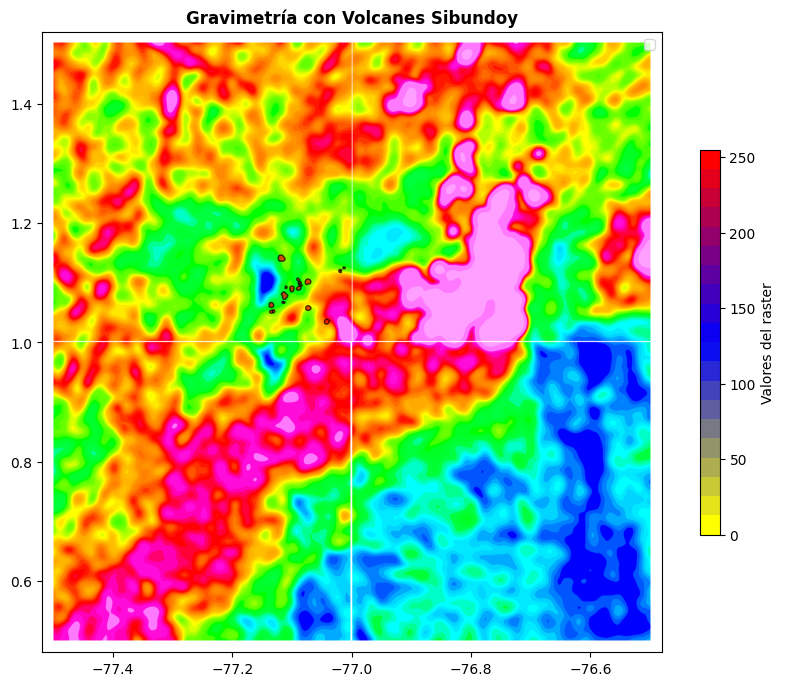

In [4]:
# Paso 1: Instalar las bibliotecas necesarias
!pip install rasterio matplotlib geopandas fiona pykml

# Paso 2: Importar las bibliotecas requeridas
import os
import zipfile
import rasterio
from rasterio.plot import show as raster_show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Paso 3: Definir las rutas de los archivos
ruta_kmz_volcanes = '/content/volcanes_Sibundoy.kmz'  # Archivo KMZ de volcanes
ruta_tiff_gravimetria = '/content/gravimetria3.tif'  # Archivo TIFF de gravimetría

# Paso 4: Función para extraer el archivo KML del KMZ
def extraer_kml_desde_kmz(ruta_kmz):
    # Crear una carpeta temporal para extraer el contenido
    carpeta_temporal = '/content/kmz_extracted'
    os.makedirs(carpeta_temporal, exist_ok=True)

    # Extraer el archivo KML del KMZ
    with zipfile.ZipFile(ruta_kmz, 'r') as kmz:
        kmz.extractall(carpeta_temporal)

    # Buscar el archivo KML dentro de la carpeta extraída
    archivos_extraidos = os.listdir(carpeta_temporal)
    for archivo in archivos_extraidos:
        if archivo.endswith('.kml'):
            return os.path.join(carpeta_temporal, archivo)

    raise FileNotFoundError("No se encontró ningún archivo KML dentro del KMZ.")

# Extraer el archivo KML de volcanes
ruta_kml_volcanes = extraer_kml_desde_kmz(ruta_kmz_volcanes)
print(f"Archivo KML de volcanes extraído: {ruta_kml_volcanes}")

# Paso 5: Leer el archivo KML con GeoPandas
try:
    # Leer el archivo KML de volcanes
    volcanes_Sibundoy = gpd.read_file(ruta_kml_volcanes)

except Exception as e:
    print(f"Error al cargar el archivo KML: {e}")

# Paso 6: Función para visualizar un raster con una capa vectorial superpuesta
def visualizar_raster_vector(raster_path, vector_data, titulo, etiqueta_vector):
    try:
        # Abrir el archivo raster
        raster = rasterio.open(raster_path)
        raster_data = raster.read(1)  # Leer la primera banda
        raster_data = np.ma.masked_where(raster_data == raster.nodata, raster_data)  # Enmascarar valores nulos

        # Definir un mapa de colores personalizado (amarillo -> azul -> rojo)
        colors = [
            (1.0, 1.0, 0.0),  # Amarillo
            (0.0, 0.0, 1.0),  # Azul
            (1.0, 0.0, 0.0)   # Rojo
        ]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=20)  # 20 pasos

        # Normalizar los datos del raster
        norm = Normalize(vmin=np.nanmin(raster_data), vmax=np.nanmax(raster_data))

        # Crear la figura
        fig, ax = plt.subplots(figsize=(10, 10))

        # Visualizar el archivo raster con el mapa de colores seleccionado
        im = ax.imshow(raster_data, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(raster))
        rasterio.plot.show(raster, ax=ax, cmap=cmap, norm=norm, title=titulo)

        # Superponer la geometría vectorial
        vector_data.plot(ax=ax, color='red', edgecolor='black', alpha=0.7, label=etiqueta_vector)

        # Agregar una barra de colores
        cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.5)
        cbar.set_label('Valores del raster')

        # Agregar una leyenda
        plt.legend(loc='upper right')

        # Mostrar la figura
        plt.show()

    except Exception as e:
        print(f"Error al cargar el archivo raster ({raster_path}): {e}")

# Paso 7: Generar la figura combinada
print("Figura: Gravimetría con Volcanes Sibundoy")
visualizar_raster_vector(ruta_tiff_gravimetria, volcanes_Sibundoy, "Gravimetría con Volcanes Sibundoy", "Volcanes")

Archivo KML de volcanes extraído: /content/kmz_extracted/doc.kml
Figura: Topografía con Volcanes Sibundoy


<ipython-input-5-b30649208a7c>:84: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')
<ipython-input-5-b30649208a7c>:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


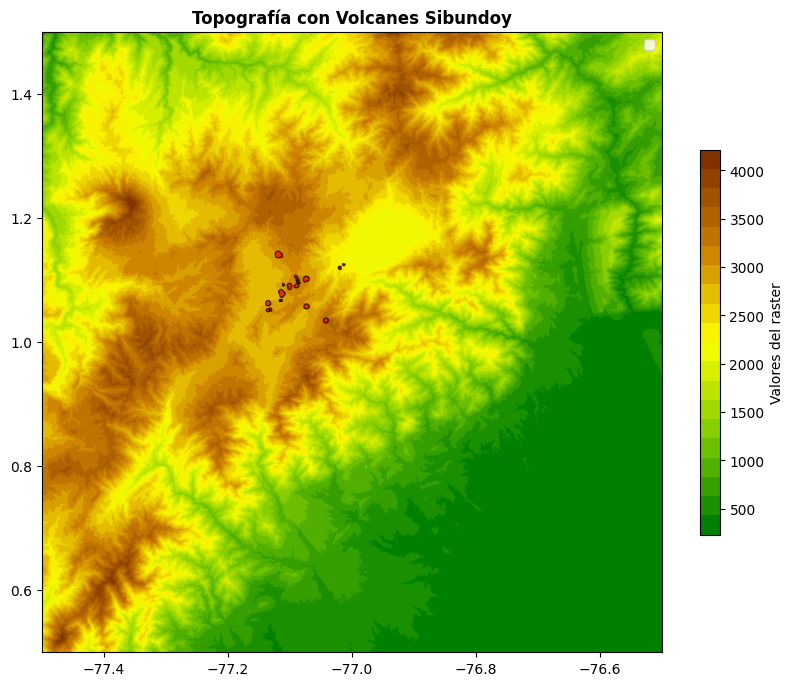

In [5]:
# Paso 1: Instalar las bibliotecas necesarias
!pip install rasterio matplotlib geopandas fiona pykml

# Paso 2: Importar las bibliotecas requeridas
import os
import zipfile
import rasterio
from rasterio.plot import show as raster_show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Paso 3: Definir las rutas de los archivos
ruta_kmz_volcanes = '/content/volcanes_Sibundoy.kmz'  # Archivo KMZ de volcanes
ruta_tiff_topografia = '/content/Topografia_Sibundoy.tif'  # Archivo TIFF de topografía

# Paso 4: Función para extraer el archivo KML del KMZ
def extraer_kml_desde_kmz(ruta_kmz):
    # Crear una carpeta temporal para extraer el contenido
    carpeta_temporal = '/content/kmz_extracted'
    os.makedirs(carpeta_temporal, exist_ok=True)

    # Extraer el archivo KML del KMZ
    with zipfile.ZipFile(ruta_kmz, 'r') as kmz:
        kmz.extractall(carpeta_temporal)

    # Buscar el archivo KML dentro de la carpeta extraída
    archivos_extraidos = os.listdir(carpeta_temporal)
    for archivo in archivos_extraidos:
        if archivo.endswith('.kml'):
            return os.path.join(carpeta_temporal, archivo)

    raise FileNotFoundError("No se encontró ningún archivo KML dentro del KMZ.")

# Extraer el archivo KML de volcanes
ruta_kml_volcanes = extraer_kml_desde_kmz(ruta_kmz_volcanes)
print(f"Archivo KML de volcanes extraído: {ruta_kml_volcanes}")

# Paso 5: Leer el archivo KML con GeoPandas
try:
    # Leer el archivo KML de volcanes
    volcanes_Sibundoy = gpd.read_file(ruta_kml_volcanes)

except Exception as e:
    print(f"Error al cargar el archivo KML: {e}")

# Paso 6: Función para visualizar un raster con una capa vectorial superpuesta
def visualizar_raster_vector(raster_path, vector_data, titulo, etiqueta_vector):
    try:
        # Abrir el archivo raster
        raster = rasterio.open(raster_path)
        raster_data = raster.read(1)  # Leer la primera banda
        raster_data = np.ma.masked_where(raster_data == raster.nodata, raster_data)  # Enmascarar valores nulos

        # Definir un mapa de colores personalizado (gradiente de verde a marrón para topografía)
        colors = [
            (0.0, 0.5, 0.0),  # Verde oscuro (valores bajos)
            (0.5, 0.8, 0.0),  # Verde claro
            (1.0, 1.0, 0.0),  # Amarillo
            (0.8, 0.5, 0.0),  # Marrón claro
            (0.5, 0.2, 0.0)   # Marrón oscuro (valores altos)
        ]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=20)  # 20 pasos

        # Normalizar los datos del raster
        norm = Normalize(vmin=np.nanmin(raster_data), vmax=np.nanmax(raster_data))

        # Crear la figura
        fig, ax = plt.subplots(figsize=(10, 10))

        # Visualizar el archivo raster con el mapa de colores seleccionado
        im = ax.imshow(raster_data, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(raster))
        rasterio.plot.show(raster, ax=ax, cmap=cmap, norm=norm, title=titulo)

        # Superponer la geometría vectorial
        vector_data.plot(ax=ax, color='red', edgecolor='black', alpha=0.7, label=etiqueta_vector)

        # Agregar una barra de colores
        cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.5)
        cbar.set_label('Valores del raster')

        # Agregar una leyenda
        plt.legend(loc='upper right')

        # Mostrar la figura
        plt.show()

    except Exception as e:
        print(f"Error al cargar el archivo raster ({raster_path}): {e}")

# Paso 7: Generar la figura combinada
print("Figura: Topografía con Volcanes Sibundoy")
visualizar_raster_vector(ruta_tiff_topografia, volcanes_Sibundoy, "Topografía con Volcanes Sibundoy", "Volcanes")